In [180]:
import json
import re
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib
import numpy as np
import networkx as nx

json_data = []
with open("tweet_stream.json") as file:
    data = file.readlines()
    for d in data:
        json_data.append(json.loads(d))

In [181]:
i = 0
for tweet in json_data:
    if ("text" in tweet) and ("user" in tweet):
        print(str(i) + " - " + tweet["user"]["name"] + " :: " + tweet["text"])
        print("---")
        i = i + 1

0 - fountain :: RT @lvlzOV1119: 191031 퀸덤 파이널

Dancing in the Moonlight🌙

@Official_LVLZ

#러블리즈 #LOVELYZ
#류수정 #수정 
#SUJEONG #スジョン https://t.co/KKTjO0jivG
---
1 - 올이옌아🐣 :: RT @lvlzOV1119: 191031 퀸덤 파이널

Dancing in the Moonlight🌙

@Official_LVLZ

#러블리즈 #LOVELYZ
#류수정 #수정 
#SUJEONG #スジョン https://t.co/KKTjO0jivG
---
2 - 김순덕 :: RT @lvlzOV1119: 191031 퀸덤 파이널

Dancing in the Moonlight🌙

@Official_LVLZ

#러블리즈 #LOVELYZ
#류수정 #수정 
#SUJEONG #スジョン https://t.co/KKTjO0jivG
---
3 - 최오리 :: RT @pencil_el: 이거슨 제가 젤 조와하는,, 오로라 퀸덤 라이브,, ㅠ 실제로 보실 수 있습니다 여러분 예사에 표 진짜 조금 남았으니가 서두르세요,,, https://t.co/W4gttUD5zE
---
4 - Roman Landero :: RT @G_I_DLE: [📽] (여자)아이들((G)I-DLE) - I-TALK #47 : 퀸덤 파이널 경연 비하인드

#여자아이들 #G_I_DLE #I_TALK

▶️ https://t.co/NIEj2gs4vg https://t.co/KICR4Pxb…
---
5 - zhafgnot ⚠️ :: RT @sweetjackpot_: 191031 퀸덤 파이널
#민니 #MINNIE #여자아이들 #G_I_DLE #아이들 #LION https://t.co/NiGb81xf7X
---
6 - 춘삼 3기 뛰자 혜윰 :: 퀸덤 보다가 자야지
---
7 - 우남규 :: RT @lvlzOV1119: 191031 퀸덤 파이널

Dancing in the Moonlight🌙

@Official_LVLZ



In [182]:
text_list = []
for tweet in json_data:
    if "text" in tweet:
        text_list.append(tweet["text"])
print(text_list)

        

['RT @lvlzOV1119: 191031 퀸덤 파이널\n\nDancing in the Moonlight🌙\n\n@Official_LVLZ\n\n#러블리즈 #LOVELYZ\n#류수정 #수정 \n#SUJEONG #スジョン https://t.co/KKTjO0jivG', 'RT @lvlzOV1119: 191031 퀸덤 파이널\n\nDancing in the Moonlight🌙\n\n@Official_LVLZ\n\n#러블리즈 #LOVELYZ\n#류수정 #수정 \n#SUJEONG #スジョン https://t.co/KKTjO0jivG', 'RT @lvlzOV1119: 191031 퀸덤 파이널\n\nDancing in the Moonlight🌙\n\n@Official_LVLZ\n\n#러블리즈 #LOVELYZ\n#류수정 #수정 \n#SUJEONG #スジョン https://t.co/KKTjO0jivG', 'RT @pencil_el: 이거슨 제가 젤 조와하는,, 오로라 퀸덤 라이브,, ㅠ 실제로 보실 수 있습니다 여러분 예사에 표 진짜 조금 남았으니가 서두르세요,,, https://t.co/W4gttUD5zE', 'RT @G_I_DLE: [📽] (여자)아이들((G)I-DLE) - I-TALK #47 : 퀸덤 파이널 경연 비하인드\n\n#여자아이들 #G_I_DLE #I_TALK\n\n▶️ https://t.co/NIEj2gs4vg https://t.co/KICR4Pxb…', 'RT @sweetjackpot_: 191031 퀸덤 파이널\n#민니 #MINNIE #여자아이들 #G_I_DLE #아이들 #LION https://t.co/NiGb81xf7X', '퀸덤 보다가 자야지', 'RT @lvlzOV1119: 191031 퀸덤 파이널\n\nDancing in the Moonlight🌙\n\n@Official_LVLZ\n\n#러블리즈 #LOVELYZ\n#류수정 #수정 \n#SUJEONG #スジョン https://t.co/KKTjO0jivG', 'RT @lvlzOV1119: 191031

In [183]:
cleaned_list = []
for text in text_list:
    tmp = re.sub('[a-zA-z]','',text)
    tmp = re.sub(r'\d','',tmp) 
    tmp = re.sub('[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"\♥\♡\ㅋ\ㅠ\ㅜ\ㄱ\ㅎ\ㄲ\ㅡ]','',tmp)
    tmp = re.sub('\n|📽|🌙|▶️|👼|🥰|🏻|🥺|💗|❤|💜|📸|🦁|👑|❤️|😭|😻|✨|…|🙌','',tmp)
    cleaned_list.append(tmp)
print(cleaned_list)
    

['   퀸덤 파이널   러블리즈 류수정 수정  スジョン ', '   퀸덤 파이널   러블리즈 류수정 수정  スジョン ', '   퀸덤 파이널   러블리즈 류수정 수정  スジョン ', '  이거슨 제가 젤 조와하는 오로라 퀸덤 라이브  실제로 보실 수 있습니다 여러분 예사에 표 진짜 조금 남았으니가 서두르세요 ', '   여자아이들     퀸덤 파이널 경연 비하인드여자아이들    ', '   퀸덤 파이널민니  여자아이들  아이들  ', '퀸덤 보다가 자야지', '   퀸덤 파이널   러블리즈 류수정 수정  スジョン ', '   퀸덤 파이널   러블리즈 류수정 수정  スジョン ', '   퀸덤 파이널   러블리즈 류수정 수정  スジョン ', '   퀸덤 파이널   러블리즈 류수정 수정  スジョン ', '제발 김태형 퀸덤 라이온 커버좀 이얼굴로 하면 뭐든 잘될거지만 목소리도 한몫해서 진짜 꼭 해줘 ', '  퀸덤 이후 화보가 이렇게 다 어벙벙한 오버사이즈 자켓을 입힌 것도 흥미로운 점인 듯 소위 매니쉬한 ', '   여자아이들     퀸덤 파이널 경연 비하인드여자아이들    ', '   퀸덤 파이널   러블리즈 류수정 수정  スジョン ', '   퀸덤 파이널   러블리즈 류수정 수정  スジョン ', '   여자아이들     퀸덤 파이널 경연 비하인드여자아이들    ', '   여자아이들     퀸덤 파이널 경연 비하인드여자아이들    ', '  퀸덤 식스퍼즐 대기실 비하인드 유아 찬미 문별 예인 ', '   퀸덤 파이널   러블리즈 류수정 수정  スジョン ', '  퀸덤 이후 화보가 이렇게 다 어벙벙한 오버사이즈 자켓을 입힌 것도 흥미로운 점인 듯 소위 매니쉬한 ', '  이거슨 제가 젤 조와하는 오로라 퀸덤 라이브  실제로 보실 수 있습니다 여러분 예사에 표 진짜 조금 남았으니가 서두르세요 ', '   퀸덤 파이널   러블리즈 류수정 수정  スジョン ', '   여자아이들     퀸덤 파이널 경연 비하인드여자아이들    ', '  최종회 ♬ 게릴라  오마이걸  

In [184]:
text = " ".join(cleaned_list)
print(text)

   퀸덤 파이널   러블리즈 류수정 수정  スジョン     퀸덤 파이널   러블리즈 류수정 수정  スジョン     퀸덤 파이널   러블리즈 류수정 수정  スジョン    이거슨 제가 젤 조와하는 오로라 퀸덤 라이브  실제로 보실 수 있습니다 여러분 예사에 표 진짜 조금 남았으니가 서두르세요     여자아이들     퀸덤 파이널 경연 비하인드여자아이들        퀸덤 파이널민니  여자아이들  아이들   퀸덤 보다가 자야지    퀸덤 파이널   러블리즈 류수정 수정  スジョン     퀸덤 파이널   러블리즈 류수정 수정  スジョン     퀸덤 파이널   러블리즈 류수정 수정  スジョン     퀸덤 파이널   러블리즈 류수정 수정  スジョン  제발 김태형 퀸덤 라이온 커버좀 이얼굴로 하면 뭐든 잘될거지만 목소리도 한몫해서 진짜 꼭 해줘    퀸덤 이후 화보가 이렇게 다 어벙벙한 오버사이즈 자켓을 입힌 것도 흥미로운 점인 듯 소위 매니쉬한     여자아이들     퀸덤 파이널 경연 비하인드여자아이들        퀸덤 파이널   러블리즈 류수정 수정  スジョン     퀸덤 파이널   러블리즈 류수정 수정  スジョン     여자아이들     퀸덤 파이널 경연 비하인드여자아이들        여자아이들     퀸덤 파이널 경연 비하인드여자아이들       퀸덤 식스퍼즐 대기실 비하인드 유아 찬미 문별 예인     퀸덤 파이널   러블리즈 류수정 수정  スジョン    퀸덤 이후 화보가 이렇게 다 어벙벙한 오버사이즈 자켓을 입힌 것도 흥미로운 점인 듯 소위 매니쉬한    이거슨 제가 젤 조와하는 오로라 퀸덤 라이브  실제로 보실 수 있습니다 여러분 예사에 표 진짜 조금 남았으니가 서두르세요     퀸덤 파이널   러블리즈 류수정 수정  スジョン     여자아이들     퀸덤 파이널 경연 비하인드여자아이들       최종회 ♬ 게릴라  오마이걸  경연 컴백전쟁  퀸덤 화          퀸덤 에이오에이 무대 보고 나무처럼 롱런이라고 이해한 사람이 있구나 어떻게든 페미니즘적인 의

In [185]:
tagger = Komoran()
tags = tagger.pos(text)
print(tags)
noun_list = []
  
for word, tag in tags:
    if tag in ['NNP', 'NNG']:
        noun_list.append(word)
print(noun_list)
noun_counts = Counter(noun_list)
noun_counts.most_common()

[('퀸', 'NNG'), ('덤', 'NNG'), ('파이널', 'NNP'), ('러블리즈', 'NNP'), ('류수정', 'NNP'), ('수정', 'NNP'), ('スジョン', 'SL'), ('퀸', 'NNG'), ('덤', 'NNG'), ('파이널', 'NNP'), ('러블리즈', 'NNP'), ('류수정', 'NNP'), ('수정', 'NNP'), ('スジョン', 'SL'), ('퀸', 'NNG'), ('덤', 'NNG'), ('파이널', 'NNP'), ('러블리즈', 'NNP'), ('류수정', 'NNP'), ('수정', 'NNP'), ('スジョン', 'SL'), ('이것', 'NP'), ('슬', 'VV'), ('ㄴ', 'ETM'), ('제가', 'NNP'), ('젤', 'NNG'), ('조와', 'NNP'), ('하', 'XSA'), ('는', 'ETM'), ('오로라', 'NNP'), ('퀸', 'NNG'), ('덤', 'NNG'), ('라이브', 'NNP'), ('실제로', 'MAG'), ('보', 'VV'), ('시', 'EP'), ('ㄹ', 'ETM'), ('수', 'NNB'), ('있', 'VV'), ('습니다', 'EC'), ('여러분', 'NNP'), ('예사', 'NNG'), ('에', 'JKB'), ('표', 'NNG'), ('진짜', 'MAG'), ('조금', 'MAG'), ('남', 'VV'), ('았', 'EP'), ('으니', 'EC'), ('가', 'JKS'), ('서두르', 'VV'), ('시', 'EP'), ('어요', 'EC'), ('여자', 'NNG'), ('아이들', 'NNP'), ('퀸', 'NNG'), ('덤', 'NNG'), ('파이널', 'NNP'), ('경연', 'NNP'), ('비', 'XPN'), ('하인', 'NNP'), ('드', 'NNP'), ('여자', 'NNP'), ('아이들', 'NNP'), ('퀸', 'NNG'), ('덤', 'NNG'), ('파이널', 'NNP'), ('민', 'NNP'

[('퀸', 123),
 ('덤', 123),
 ('파이널', 55),
 ('아이들', 53),
 ('여자', 45),
 ('러블리즈', 29),
 ('류수정', 27),
 ('수정', 27),
 ('경연', 22),
 ('하인', 19),
 ('드', 19),
 ('오로라', 17),
 ('여러분', 15),
 ('제가', 14),
 ('젤', 14),
 ('조와', 14),
 ('라이브', 14),
 ('예사', 14),
 ('표', 14),
 ('오마이걸', 8),
 ('에이', 8),
 ('오에이', 8),
 ('민', 7),
 ('컴백', 7),
 ('전쟁', 7),
 ('무대', 6),
 ('진짜', 6),
 ('고음', 6),
 ('파트', 6),
 ('천재', 6),
 ('문별', 5),
 ('여왕', 5),
 ('소연', 5),
 ('우기', 5),
 ('어', 4),
 ('게릴라', 4),
 ('덕', 4),
 ('야', 4),
 ('곡', 4),
 ('스테이지', 4),
 ('자리', 4),
 ('걸', 4),
 ('그룹', 4),
 ('하루', 4),
 ('화보', 3),
 ('화', 3),
 ('네버랜드', 3),
 ('영상', 3),
 ('입', 3),
 ('팬', 3),
 ('개인', 3),
 ('미연', 3),
 ('노래', 3),
 ('날', 3),
 ('낮', 3),
 ('사', 3),
 ('녹도', 3),
 ('감기', 3),
 ('상태', 3),
 ('소화', 3),
 ('한', 3),
 ('보컬', 3),
 ('김민', 3),
 ('랩', 3),
 ('대사', 3),
 ('친목', 3),
 ('이후', 2),
 ('오버', 2),
 ('사이즈', 2),
 ('흥미', 2),
 ('매니', 2),
 ('식스', 2),
 ('퍼즐', 2),
 ('대기실', 2),
 ('최', 2),
 ('종회', 2),
 ('최대', 2),
 ('수혜자', 2),
 ('심장', 2),
 ('뭐', 2),
 ('시냐', 2),
 ('소', 2)

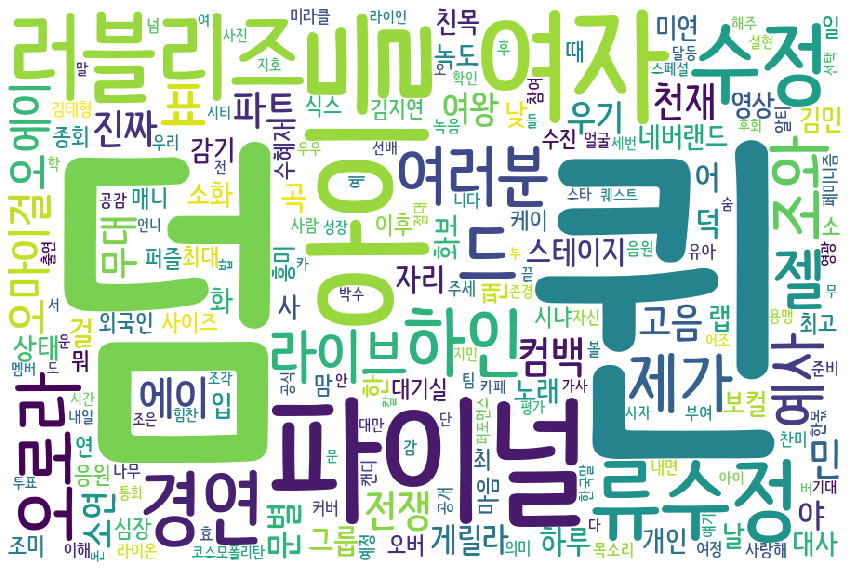

In [186]:
cloud = WordCloud(width=900, height=600, 
                  font_path='NanumBarunpenB.otf',
                  background_color='white')
cloud = cloud.fit_words(noun_counts)
plt.figure(figsize=(15, 20))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [187]:
all_list =[]
for word, tag in tags:
    if tag in ['ETM', 'SS','ETN','JX','NNB','EC','EP','JKB']:
        continue
    else:
        all_list.append(word)
print(all_list)
all_counts = Counter(all_list)
all_counts.most_common()

['퀸', '덤', '파이널', '러블리즈', '류수정', '수정', 'スジョン', '퀸', '덤', '파이널', '러블리즈', '류수정', '수정', 'スジョン', '퀸', '덤', '파이널', '러블리즈', '류수정', '수정', 'スジョン', '이것', '슬', '제가', '젤', '조와', '하', '오로라', '퀸', '덤', '라이브', '실제로', '보', '있', '여러분', '예사', '표', '진짜', '조금', '남', '가', '서두르', '여자', '아이들', '퀸', '덤', '파이널', '경연', '비', '하인', '드', '여자', '아이들', '퀸', '덤', '파이널', '민', '이', '여자', '아이들', '아이들', '퀸', '덤', '보', '자', '퀸', '덤', '파이널', '러블리즈', '류수정', '수정', 'スジョン', '퀸', '덤', '파이널', '러블리즈', '류수정', '수정', 'スジョン', '퀸', '덤', '파이널', '러블리즈', '류수정', '수정', 'スジョン', '퀸', '덤', '파이널', '러블리즈', '류수정', '수정', 'スジョン', '제발', '김태형', '퀸', '덤', '라이온', '커버', '좀', '이', '얼굴', '하', '뭐', '이', '잘', '되', '이', '목소리', '한몫', '하', '진짜', '꼭', '하', '주', '퀸', '덤', '이후', '화보', '가', '이렇', '다', '어', '벙벙', '하', '오버', '사이즈', '자켓을', '입히', '흥미', '롭', '이', '소위', '매니', '쉬', '하', '여자', '아이들', '퀸', '덤', '파이널', '경연', '비', '하인', '드', '여자', '아이들', '퀸', '덤', '파이널', '러블리즈', '류수정', '수정', 'スジョン', '퀸', '덤', '파이널', '러블리즈', '류수정', '수정', 'スジョン', '여자', '아이들', '퀸', '덤', '파이널'

[('퀸', 123),
 ('덤', 123),
 ('파이널', 55),
 ('아이들', 53),
 ('하', 46),
 ('여자', 45),
 ('이', 35),
 ('러블리즈', 29),
 ('류수정', 27),
 ('수정', 27),
 ('スジョン', 27),
 ('보', 26),
 ('진짜', 26),
 ('경연', 22),
 ('가', 19),
 ('비', 19),
 ('하인', 19),
 ('드', 19),
 ('있', 18),
 ('오로라', 17),
 ('여러분', 15),
 ('이것', 14),
 ('슬', 14),
 ('제가', 14),
 ('젤', 14),
 ('조와', 14),
 ('라이브', 14),
 ('실제로', 14),
 ('예사', 14),
 ('표', 14),
 ('조금', 14),
 ('남', 14),
 ('서두르', 14),
 ('를', 11),
 ('의', 10),
 ('두', 10),
 ('주', 9),
 ('오마이걸', 8),
 ('에이', 8),
 ('오에이', 8),
 ('민', 7),
 ('컴백', 7),
 ('전쟁', 7),
 ('무대', 6),
 ('들', 6),
 ('고음', 6),
 ('파트', 6),
 ('천재', 6),
 ('문별', 5),
 ('을', 5),
 ('오', 5),
 ('많이', 5),
 ('전', 5),
 ('여왕', 5),
 ('소연', 5),
 ('우기', 5),
 ('되', 4),
 ('다', 4),
 ('어', 4),
 ('게릴라', 4),
 ('덕', 4),
 ('야', 4),
 ('곡', 4),
 ('지', 4),
 ('스테이지', 4),
 ('자리', 4),
 ('펼쳐지', 4),
 ('걸', 4),
 ('그룹', 4),
 ('너무', 4),
 ('하루', 4),
 ('뭐', 3),
 ('잘', 3),
 ('화보', 3),
 ('쉬', 3),
 ('화', 3),
 ('나', 3),
 ('내', 3),
 ('카', 3),
 ('네버랜드', 3),
 ('영상', 3),
 ('입',

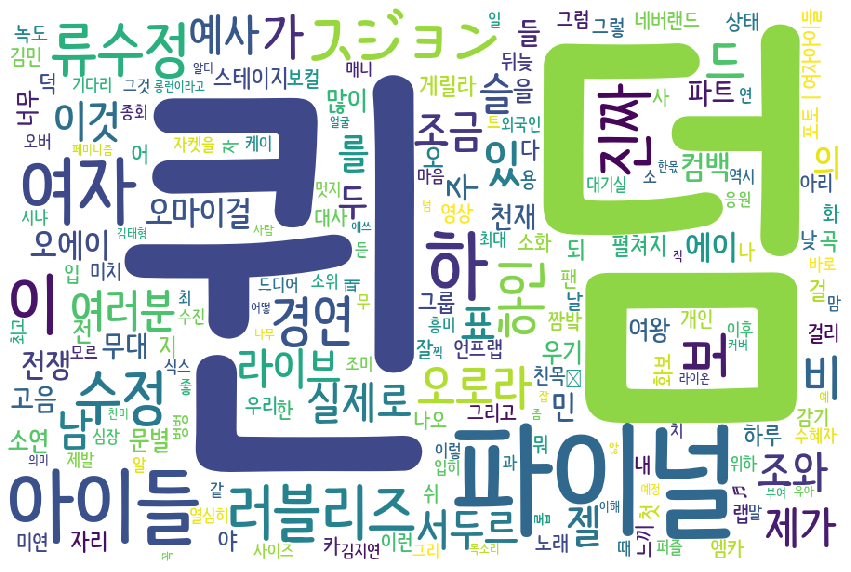

In [188]:
cloud2 = WordCloud(width=900, height=600, 
                  font_path='NanumBarunpenB.otf',
                  background_color='white')
cloud2 = cloud2.fit_words(all_counts)
plt.figure(figsize=(15, 20))
plt.axis('off')
plt.imshow(cloud2)
plt.show()